# Music collection overview

### 1. Music style analysis
Statistical results of style prediction from the dataset

In [35]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

In [36]:
# Load analysis results - extracted features

with open('/mnt/f/SMC/AMPLAB/assignment_01/analysis_results/analysis_results.json', 'r') as f:
    analysis_results = json.load(f)

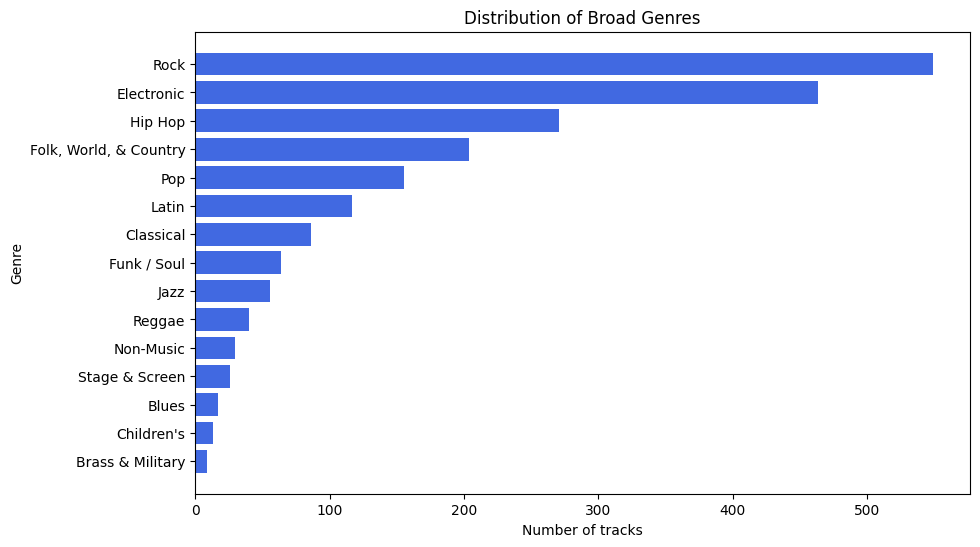

In [ ]:

# Load the discogs-effnet-bs64-1.json file to get the genre information
with open('/mnt/f/SMC/AMPLAB/assignment_01/models/discogs-effnet-bs64-1.json', 'r') as f:
    discogs_info = json.load(f)

# Create a mapping from music style indexes to parent genres
style_to_genre = {}
for idx, style in enumerate(discogs_info['classes']):
    genre = style.split('---')[0]
    style_to_genre[idx] = genre

# Extract the highest activation music style for each track
top_styles = []
for result in analysis_results:
    styles = result['music_styles']
    highest_style = max(styles, key=lambda x: x['probability'])
    top_styles.append(highest_style['style'])

# Aggregate styles to get the distribution
style_counts = Counter(top_styles)

# Extract parent broad genres
genre_counts = defaultdict(int)
for style, count in style_counts.items():
    genre = style_to_genre[int(style.split('_')[1])]
    genre_counts[genre] += count

# Sort genres by count
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genres = [genre for genre, count in sorted_genres]
counts = [count for genre, count in sorted_genres]

# Plot genres
plt.figure(figsize=(10, 6))
plt.barh(genres, counts, color='royalblue')
plt.xlabel('Number of tracks')
plt.ylabel('Genre')
plt.title('Distribution of Broad Genres')
plt.gca().invert_yaxis() 
plt.show()

# Save results as a TSV file
with open('/mnt/f/SMC/AMPLAB/assignment_01/analysis_results/music_styles_distribution.tsv', 'w') as f:
    f.write('genre\tcount\n')
    for genre, count in genre_counts.items():
        f.write(f'{genre}\t{count}\n')

### 2. Danceability analysis

Distribution of the tempo and danceability features to analyze how fast and danceable the music is

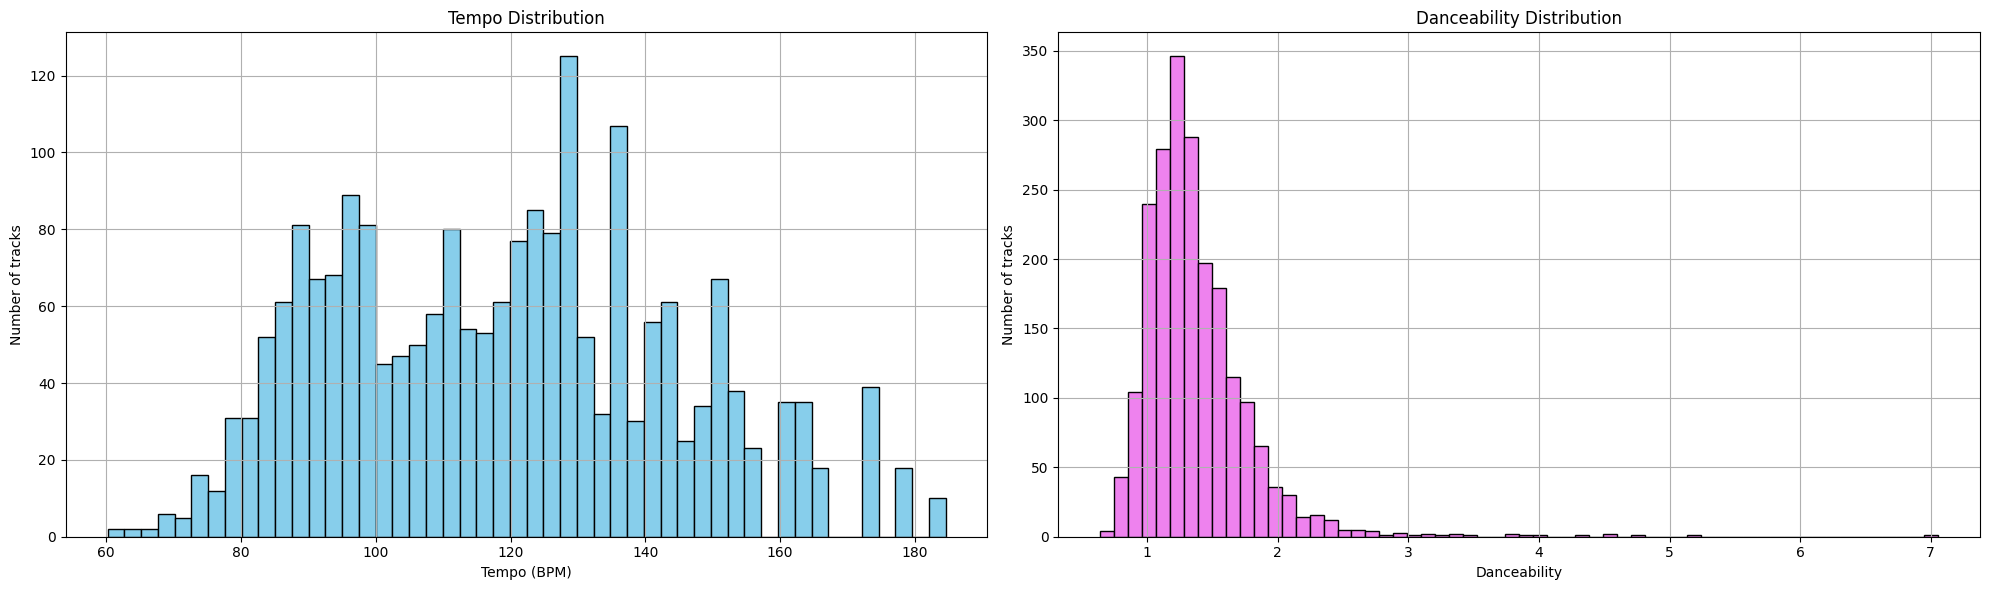

In [70]:
# Extract tempo and danceability values
tempos = [result['tempo'] for result in analysis_results if 'tempo' in result]
danceabilities = [result['danceability']['danceability'] for result in analysis_results if 'danceability' in result]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot tempo distribution
axs[0].hist(tempos, bins=50, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Tempo (BPM)')
axs[0].set_ylabel('Number of tracks')
axs[0].set_title('Tempo Distribution')
axs[0].grid(True)

# Plot danceability distribution
axs[1].hist(danceabilities, bins=60, color='violet', edgecolor='black')
axs[1].set_xlabel('Danceability')
axs[1].set_ylabel('Number of tracks')
axs[1].set_title('Danceability Distribution')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### 3. Key/Scale analysis

Analysis of the key and scales of the music in the dataset. 
The plot distribution is according to three different profiles - (`temperley`, `krumhansl`, `edma`)

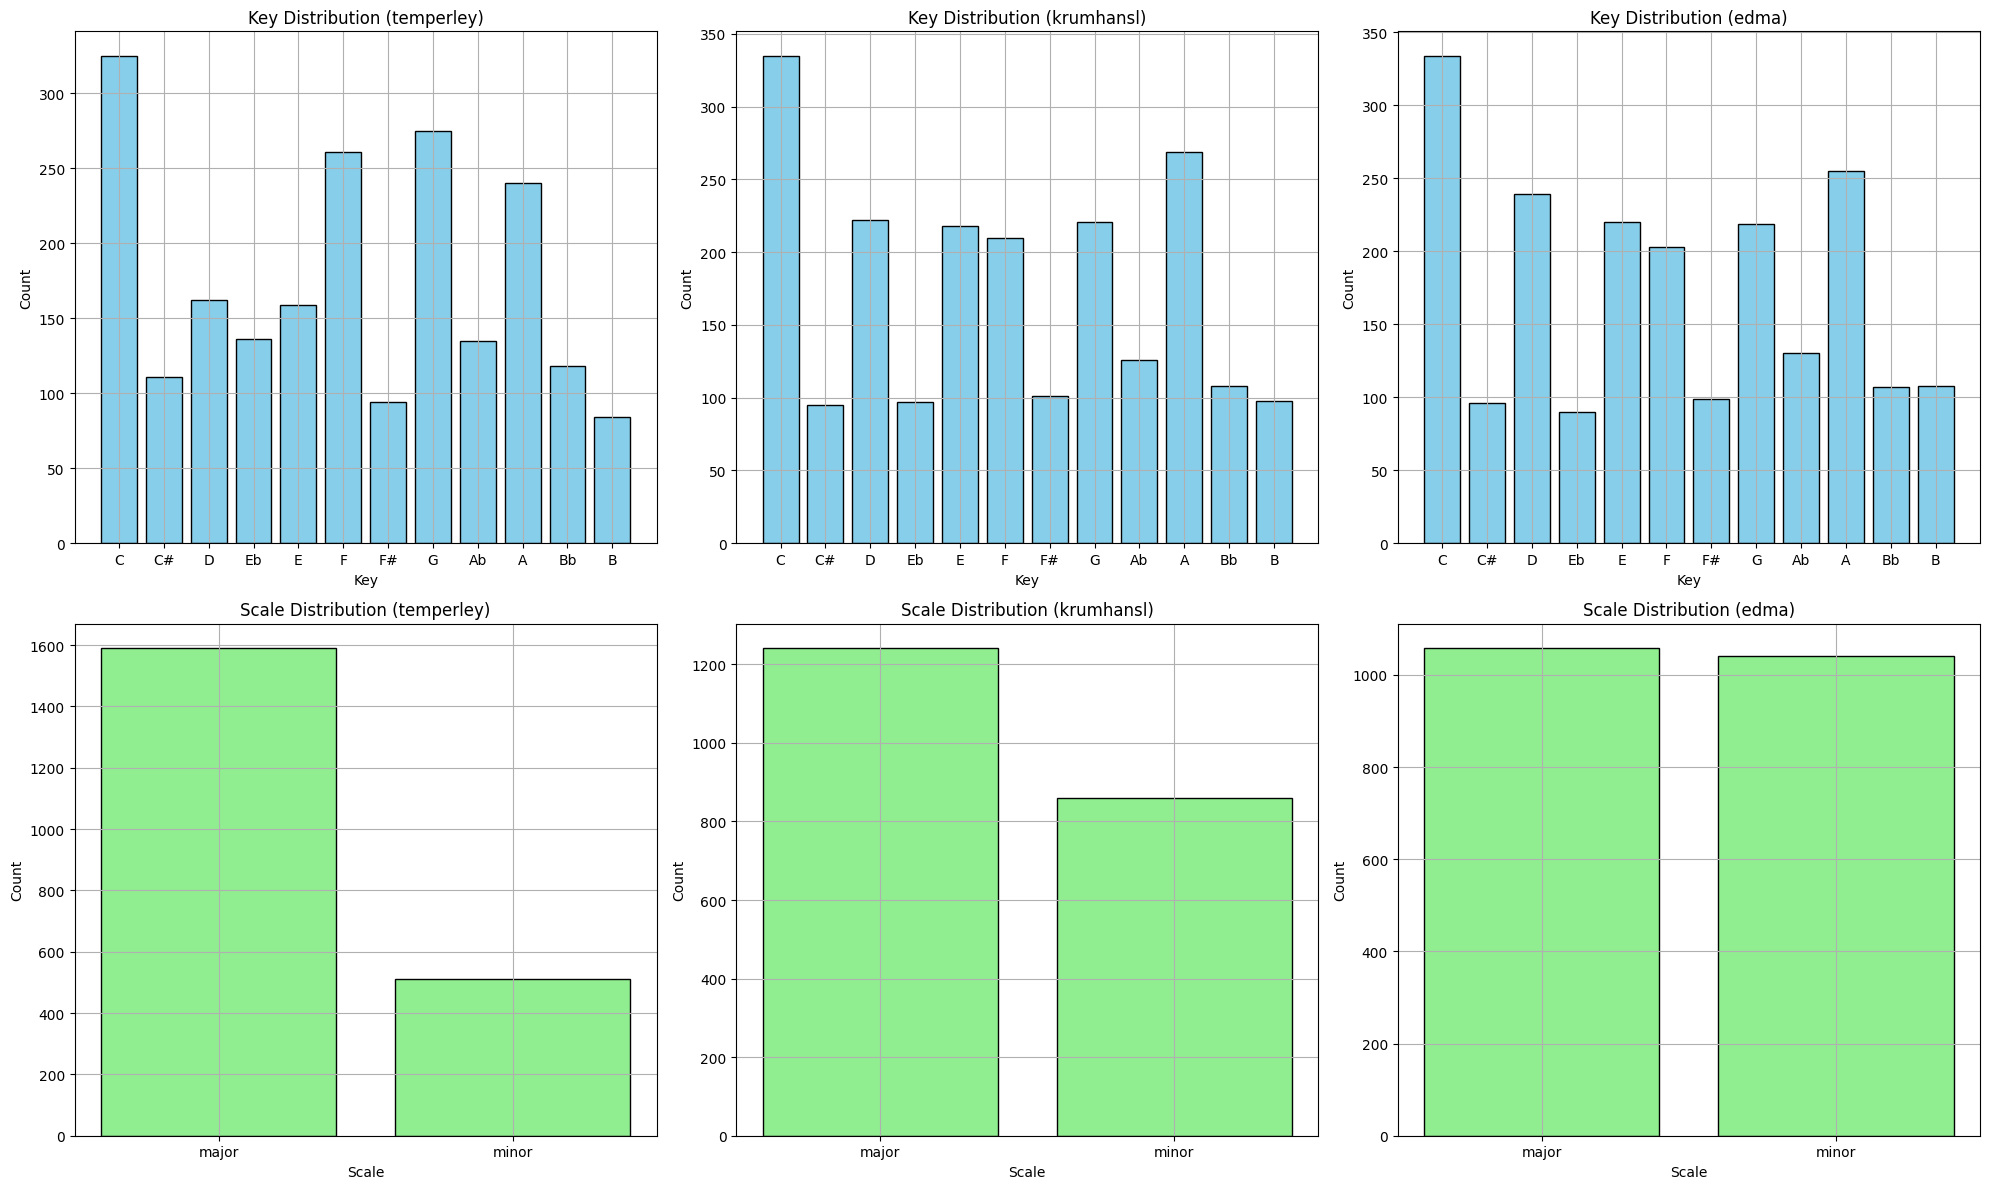

In [81]:

# Initialize counters for keys and scales for each profile
key_counts = {'temperley': Counter(), 'krumhansl': Counter(), 'edma': Counter()}
scale_counts = {'temperley': Counter(), 'krumhansl': Counter(), 'edma': Counter()}

# Extract key and scale information for each profile
for result in analysis_results:
    if 'key_analysis' in result:
        for profile in ['temperley', 'krumhansl', 'edma']:
            if profile in result['key_analysis']:
                key_info = result['key_analysis'][profile]
                key_counts[profile][key_info['key']] += 1
                scale_counts[profile][key_info['scale']] += 1

# consistent order for keys and scales
key_order = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
scale_order = ['major', 'minor']

# Create subplots for key and scale distributions
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

# Plot key distribution for each profile
for i, profile in enumerate(['temperley', 'krumhansl', 'edma']):
    keys = key_order
    counts = [key_counts[profile][key] for key in keys]
    
    axs[0, i].bar(keys, counts, color='skyblue', edgecolor='black')
    axs[0, i].set_xlabel('Key')
    axs[0, i].set_ylabel('Count')
    axs[0, i].set_title(f'Key Distribution ({profile})')
    axs[0, i].grid(True)

# Plot scale distribution for each profile
for i, profile in enumerate(['temperley', 'krumhansl', 'edma']):
    scales = scale_order
    counts = [scale_counts[profile][scale] for scale in scales]
    
    axs[1, i].bar(scales, counts, color='lightgreen', edgecolor='black')
    axs[1, i].set_xlabel('Scale')
    axs[1, i].set_ylabel('Count')
    axs[1, i].set_title(f'Scale Distribution ({profile})')
    axs[1, i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Loudness analysis
Loudness distribution across the dataset - LUFS distribution

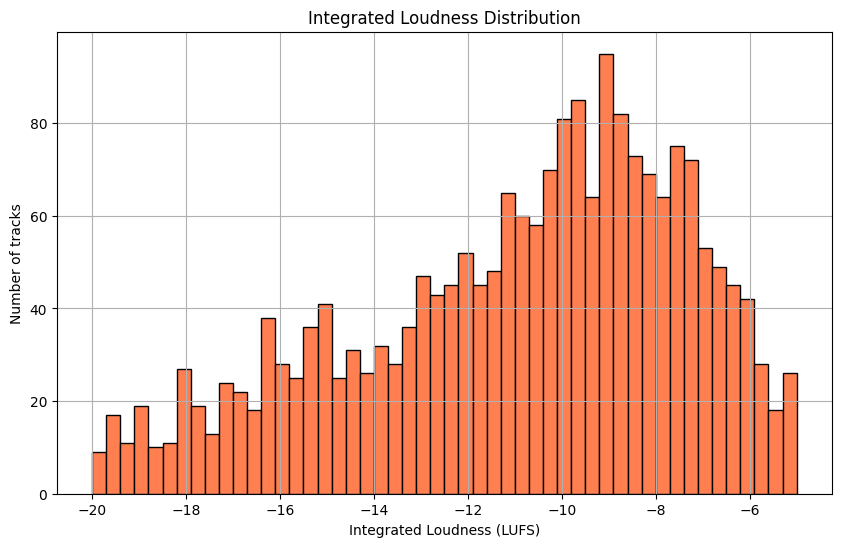

In [82]:
# Extract integrated loudness values
loudness_values = [result['loudness_integrated'] for result in analysis_results if 'loudness_integrated' in result]

# Plot integrated loudness distribution
plt.figure(figsize=(10, 6))
plt.hist(loudness_values, bins=50, color='coral', edgecolor='black')
plt.xlabel('Integrated Loudness (LUFS)')
plt.ylabel('Number of tracks')
plt.title('Integrated Loudness Distribution')
plt.grid(True)
plt.show()

### 5. Arousal/valence emotion analysis
Representation of music in terms of emotion - Arousal/Valence

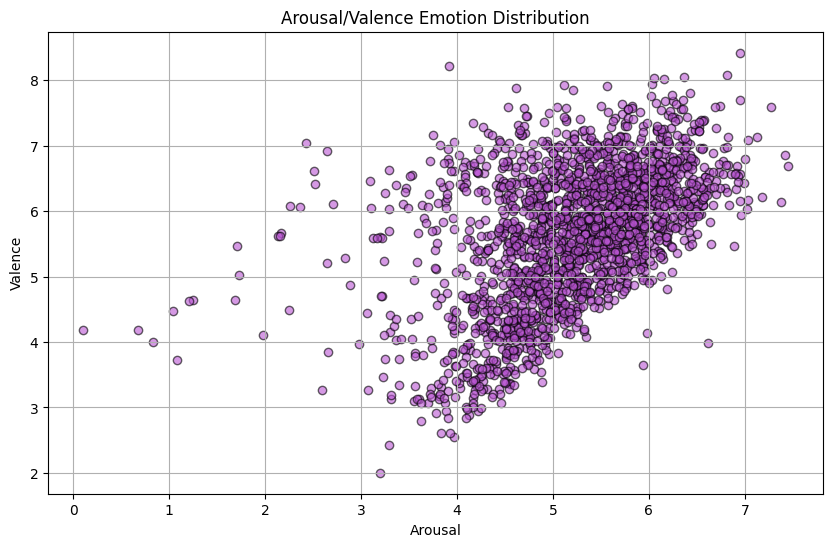

In [83]:
# Extract emotion values (arousal and valence) from analysis results
arousal = []
valence = []
for result in analysis_results:
    if 'emotion' in result:
        arousal.append(result['emotion']['arousal'])
        valence.append(result['emotion']['valence'])

# Create a scatter plot for the arousal/valence emotion distribution
plt.figure(figsize=(10, 6))
plt.scatter(arousal, valence, color='mediumorchid', alpha=0.6, edgecolor='black')
plt.xlabel('Arousal')
plt.ylabel('Valence')
plt.title('Arousal/Valence Emotion Distribution')
plt.grid(True)
plt.show()

### Vocal vs Instrumental distribution
Distribution of tracks that are vocal and tracks that are instrumental


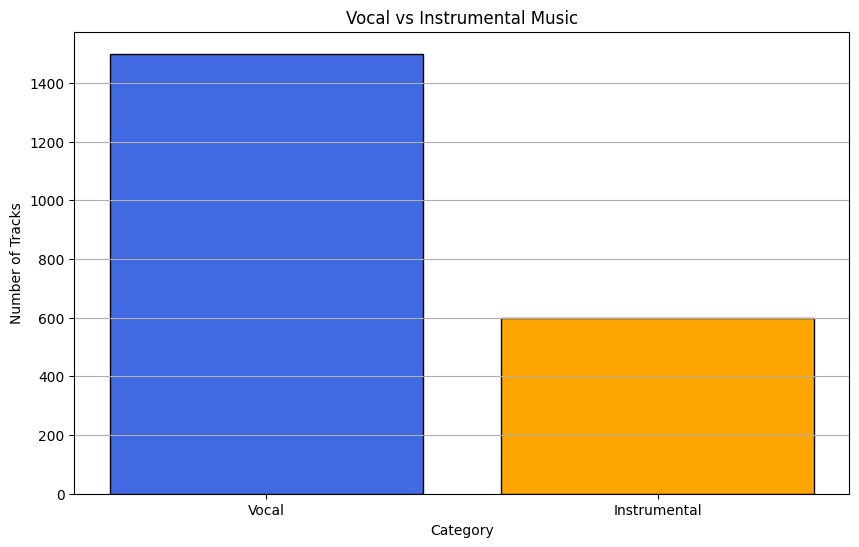

In [90]:
# Count vocal versus instrumental tracks
vocal_count = 0
instrumental_count = 0

for result in analysis_results:
    if 'voice_instrumental' in result:
        voice_prob = result['voice_instrumental']['voice']
        instrumental_prob = result['voice_instrumental']['instrumental']
        if voice_prob > instrumental_prob:
            vocal_count += 1
        else:
            instrumental_count += 1

# Prepare data for plotting
categories = ['Vocal', 'Instrumental']
counts = [vocal_count, instrumental_count]

# Plot both categories in a single graph
plt.figure(figsize=(10,6))
plt.bar(categories, counts, color=['royalblue', 'orange'], edgecolor='black')
plt.title('Vocal vs Instrumental Music')
plt.xlabel('Category')
plt.ylabel('Number of Tracks')
plt.grid(axis='y')
plt.show()